In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt  
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

### The purpose of this notebook is to check the maximum possible correlation found between completely independent variables as a function of the number of observations of these variables.

In [15]:
def get_distribution_of_max_correlations(variables, observations):
    list_of_correlations = []
    for k in range(100):
        correlations = []
        data_dict = dict((i,[]) for i in range(variables))
        # create a dataset with # observations
        for i in range(variables):
            data_dict[i] = np.random.normal(loc=0.0, scale=1.0, size=observations)     
        
        # compute all of the inter-variables correlations
        for i in range(variables-1):  
            for j in range(i+1,variables):
                correlations.append(np.corrcoef(data_dict[i], data_dict[j])[0][1]) 
        
        # get the max correlation found and repeat this process 100 times
        list_of_correlations.append(max(correlations))
            
    mean_max_correlations = np.mean(list_of_correlations)
    std_max_correlations = np.std(list_of_correlations)

    return mean_max_correlations, std_max_correlations, list_of_correlations

In [23]:
list_of_correlations_by_obs = []
# loop through the above function varying the number of observations
for i in range(100):
    max_correlation, _, _ = get_distribution_of_max_correlations(variables=10, observations=i)
    list_of_correlations_by_obs.append(max_correlation)

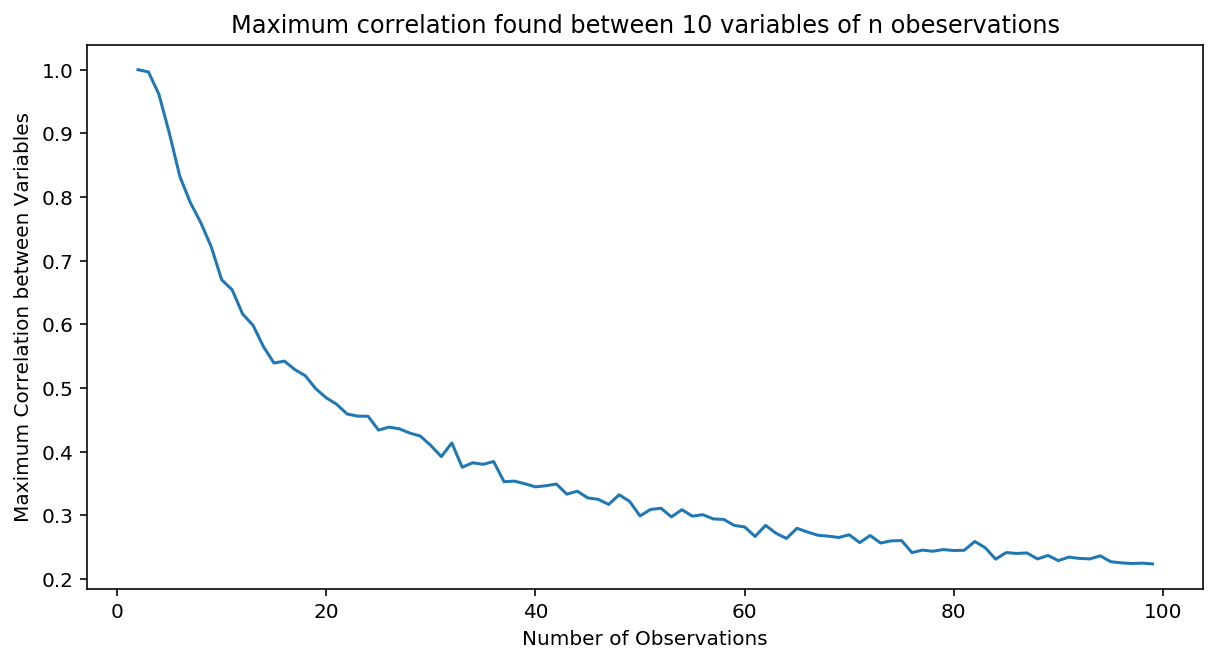

In [27]:
mpl.rcParams['figure.figsize'] = (10,5)
plt.plot(range(100), list_of_correlations_by_obs)
plt.xlabel("Number of Observations")
plt.ylabel("Maximum Correlation between Variables")
plt.title("Maximum correlation found between 10 variables of n obeservations")
plt.show()